# Predicting Dropouts on a MOOC Learning Platform

## Building the Classifiers

In this first section we construct three classifiers from the training data using Weka's default parameters.

We use the [training data](http://www.ittc.ku.edu/~jhuan/EECS738_F15/slides/EECS738_Train.csv) provided on the course website, with two modifications:

1. We've added headers with a unique identifier for each column in the dataset: `ID` for the Enrollment ID (column index 0), `Lbl` for the label (index 1), `C01–C14` for the course-related features (indices 2 through 15), `U01–U10` for the user-related features (indices 16 through 25), and `E01–E26` for the enrollment-related features (indices 26 through 51).

1. We replaced the original integer values of the labels with equivalent string representations (i.e., `0` -> `zero` and `1` -> `one`). This allows the J48 classifier to treat the data correctly (i.e., as nominal classification rather than numeric).

#### Setting up the Environment

First we need to start the Java virtual machine and locate the directory with the data. (This does require that the `weka.jar` file can be found by the Java CLASSPATH.)

In [1]:
import weka.core.jvm as jvm
jvm.start()
data_dir = 'datafiles/'

Then we need to set up the data loader for CSV files.

In [2]:
from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.CSVLoader")

Load the data file and specify that the label is found in the second column.

In [3]:
data = loader.load_file(data_dir + 'EECS738_Train.csv')
data.class_index = 1 # first column is enrollment ID, second column is label

### 1. J48 Classifier

Construct a classifier for the data.

In [4]:
from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.trees.J48") # use default (-C=0.25)
# cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
cls.build_classifier(data)

Output some predictions.

In [5]:
for idx, inst in enumerate(data):
    if idx <= 10:
        pred = cls.classify_instance(inst)
        dist = cls.distribution_for_instance(inst)
        print(str(idx+1)+': label index='+str(pred)+', class distribution='+str(dist))

1: label index=0.0, class distribution=[ 0.96322131  0.03677869]
2: label index=0.0, class distribution=[ 1.  0.]
3: label index=1.0, class distribution=[ 0.07080634  0.92919366]
4: label index=1.0, class distribution=[ 0.04225726  0.95774274]
5: label index=1.0, class distribution=[ 0.04225726  0.95774274]
6: label index=1.0, class distribution=[ 0.04225726  0.95774274]
7: label index=1.0, class distribution=[ 0.04225726  0.95774274]
8: label index=0.0, class distribution=[ 0.93375394  0.06624606]
9: label index=1.0, class distribution=[ 0.04225726  0.95774274]
10: label index=1.0, class distribution=[ 0.04225726  0.95774274]
11: label index=1.0, class distribution=[ 0.04225726  0.95774274]


Print the model.

In [6]:
print(cls)

J48 pruned tree
------------------

E14 <= 0.0694
|   E09 <= 2
|   |   E26 <= 22
|   |   |   E09 <= 1: one (33864.0/1431.0)
|   |   |   E09 > 1
|   |   |   |   E26 <= 15
|   |   |   |   |   E05 <= 129
|   |   |   |   |   |   U05 <= 24: one (4477.0/317.0)
|   |   |   |   |   |   U05 > 24
|   |   |   |   |   |   |   U10 <= 2
|   |   |   |   |   |   |   |   U06 <= 0
|   |   |   |   |   |   |   |   |   U03 <= 207
|   |   |   |   |   |   |   |   |   |   C07 <= 6682
|   |   |   |   |   |   |   |   |   |   |   U02 <= 1: one (32.0)
|   |   |   |   |   |   |   |   |   |   |   U02 > 1
|   |   |   |   |   |   |   |   |   |   |   |   U04 <= 24
|   |   |   |   |   |   |   |   |   |   |   |   |   ID <= 95371: one (3.0)
|   |   |   |   |   |   |   |   |   |   |   |   |   ID > 95371: zero (4.0)
|   |   |   |   |   |   |   |   |   |   |   |   U04 > 24: one (17.0)
|   |   |   |   |   |   |   |   |   |   C07 > 6682
|   |   |   |   |   |   |   |   |   |   |   E26 <= 6: one (11.0)
|   |   |   |   |   |   |

Draw a graph. (Commented out because this graph is way, way too large to display—it triggers a DecompressionBombWarning).

In [7]:
#import weka.plot.graph as graph
#graph.plot_dot_graph(cls.graph)

### 2. Naive Bayes Classifier

Construct a classifier for the data.

In [8]:
from weka.classifiers import Classifier
cls_nb = Classifier(classname="weka.classifiers.bayes.NaiveBayes")
cls_nb.build_classifier(data)

Output some predictions.

In [9]:
for idx, inst in enumerate(data):
    if idx <= 10:
        pred = cls_nb.classify_instance(inst)
        dist = cls_nb.distribution_for_instance(inst)
        print(str(idx+1)+': label index='+str(pred)+', class distribution='+str(dist))

1: label index=0.0, class distribution=[  1.00000000e+000   2.00090437e-175]
2: label index=0.0, class distribution=[  1.00000000e+00   2.18515068e-22]
3: label index=1.0, class distribution=[  3.97381327e-11   1.00000000e+00]
4: label index=1.0, class distribution=[  8.95592361e-21   1.00000000e+00]
5: label index=1.0, class distribution=[  1.61851914e-14   1.00000000e+00]
6: label index=1.0, class distribution=[  7.06028918e-19   1.00000000e+00]
7: label index=1.0, class distribution=[  2.08246334e-18   1.00000000e+00]
8: label index=0.0, class distribution=[  1.00000000e+000   1.75965850e-101]
9: label index=1.0, class distribution=[  1.70898405e-16   1.00000000e+00]
10: label index=1.0, class distribution=[  4.99534874e-14   1.00000000e+00]
11: label index=1.0, class distribution=[  2.54783676e-20   1.00000000e+00]


Print the model.

In [10]:
print(cls_nb)

Naive Bayes Classifier

                     Class
Attribute             zero         one
                    (0.21)      (0.79)
ID
  mean           69161.8119 108574.0904
  std. dev.      53817.9759  56486.4419
  weight sum          14977       57349
  precision          2.7778      2.7778

C01
  mean             576.9411    619.2284
  std. dev.        438.9725    466.3062
  weight sum          14977       57349
  precision         51.0541     51.0541

C02
  mean              13.9555     14.1025
  std. dev.          3.3771      3.7047
  weight sum          14977       57349
  precision          1.2667      1.2667

C03
  mean              94.2511    105.9059
  std. dev.        119.4128    131.3999
  weight sum          14977       57349
  precision         14.3824     14.3824

C04
  mean             107.6168    116.8275
  std. dev.         91.7421     93.2832
  weight sum          14977       57349
  precision         14.5313     14.5313

C05
  mean                29.62     38.1657
  s

### 3. Logistic Regression Classifier

Construct a classifier for the data.

In [11]:
from weka.classifiers import Classifier
cls_l = Classifier(classname="weka.classifiers.functions.Logistic")
cls_l.build_classifier(data)

Output some predictions.

In [12]:
for idx, inst in enumerate(data):
    if idx <= 10:
        pred = cls_l.classify_instance(inst)
        dist = cls_l.distribution_for_instance(inst)
        print(str(idx+1)+': label index='+str(pred)+', class distribution='+str(dist))

1: label index=0.0, class distribution=[ 0.99130929  0.00869071]
2: label index=1.0, class distribution=[ 0.43469518  0.56530482]
3: label index=1.0, class distribution=[ 0.02625137  0.97374863]
4: label index=1.0, class distribution=[ 0.02023426  0.97976574]
5: label index=1.0, class distribution=[ 0.01948123  0.98051877]
6: label index=1.0, class distribution=[ 0.01391345  0.98608655]
7: label index=1.0, class distribution=[ 0.0205136  0.9794864]
8: label index=0.0, class distribution=[ 0.77916765  0.22083235]
9: label index=1.0, class distribution=[ 0.04178377  0.95821623]
10: label index=1.0, class distribution=[ 0.02686211  0.97313789]
11: label index=1.0, class distribution=[ 0.025309  0.974691]


Print the model.

In [13]:
print(cls_l)

Logistic Regression with ridge parameter of 1.0E-8
Coefficients...
                              Class
Variable                       zero
ID                               -0
C01                           0.001
C02                          0.0159
C03                         -0.0014
C04                         -0.0008
C05                         -0.0004
C06                         -0.0049
C07                          0.0006
C08                              -0
C09                         -0.2982
C10                         -0.0011
C12                           0.118
C13                           0.031
C14                         -0.3034
U01                          0.0336
U02                         -0.0078
U03                          0.0001
U04                         -0.0032
U05                          0.0133
U06                         -0.0277
U07                          0.0503
U08                         -0.0196
U09                          0.0409
U10                         -0.01

## Measuring Classifier Accuracy

First we need to set up and initialize an `Evaluation` instance.

In [14]:
from weka.classifiers import Evaluation
from weka.core.classes import Random

Conduct ten-fold cross-validation on the J48 classifier.

In [15]:
eval_j48 = Evaluation(data)
eval_j48.crossvalidate_model(cls, data, 10, Random(1))
print(eval_j48.summary())


Correctly Classified Instances       61721               85.3372 %
Incorrectly Classified Instances     10605               14.6628 %
Kappa statistic                          0.522 
Mean absolute error                      0.1849
Root mean squared error                  0.3667
Relative absolute error                 56.312  %
Root relative squared error             90.486  %
Coverage of cases (0.95 level)          92.2365 %
Mean rel. region size (0.95 level)      77.8565 %
Total Number of Instances            72326     



In [16]:
print("pctCorrect: " + str(eval_j48.percent_correct))
print("incorrect: " + str(eval_j48.incorrect))

pctCorrect: 85.3372231286
incorrect: 10605.0


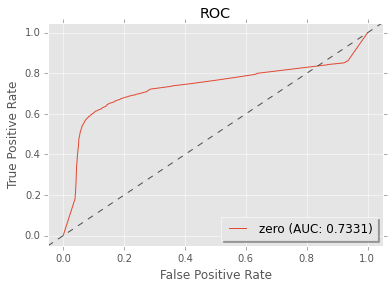

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import weka.plot.classifiers as plcls # matplotlib is requires
plcls.plot_roc(eval_j48, wait=True)

Conduct ten-fold cross-validation on the Naive Bayes classifier.

In [18]:
eval_nb = Evaluation(data)
eval_nb.crossvalidate_model(cls_nb, data, 10, Random(1))
print(eval_nb.summary())


Correctly Classified Instances       61438               84.9459 %
Incorrectly Classified Instances     10888               15.0541 %
Kappa statistic                          0.5459
Mean absolute error                      0.1509
Root mean squared error                  0.3819
Relative absolute error                 45.9533 %
Root relative squared error             94.252  %
Coverage of cases (0.95 level)          86.3396 %
Mean rel. region size (0.95 level)      51.476  %
Total Number of Instances            72326     



In [19]:
print("pctCorrect: " + str(eval_nb.percent_correct))
print("incorrect: " + str(eval_nb.incorrect))

pctCorrect: 84.9459392196
incorrect: 10888.0


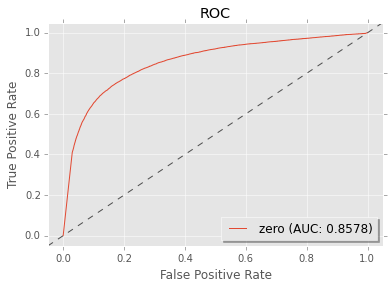

In [20]:
%matplotlib inline
import weka.plot.classifiers as plcls # matplotlib is requires
plcls.plot_roc(eval_nb, wait=True)

Conduct ten-fold cross-validation on the Logistic classifier.

In [21]:
eval_l = Evaluation(data)
eval_l.crossvalidate_model(cls_l, data, 10, Random(1))
print(eval_l.summary())


Correctly Classified Instances       63387               87.6407 %
Incorrectly Classified Instances      8939               12.3593 %
Kappa statistic                          0.5814
Mean absolute error                      0.1889
Root mean squared error                  0.3068
Relative absolute error                 57.5362 %
Root relative squared error             75.7242 %
Coverage of cases (0.95 level)          98.7764 %
Mean rel. region size (0.95 level)      81.2778 %
Total Number of Instances            72326     



In [22]:
print("pctCorrect: " + str(eval_l.percent_correct))
print("incorrect: " + str(eval_l.incorrect))

pctCorrect: 87.6406824655
incorrect: 8939.0


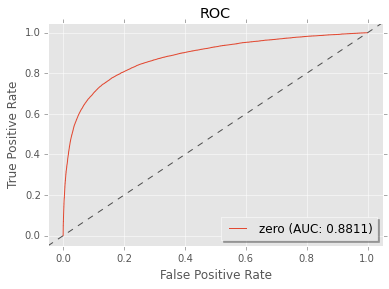

In [23]:
%matplotlib inline
import weka.plot.classifiers as plcls # matplotlib is required
plcls.plot_roc(eval_l, wait=True)

### Conclusions

We built three classifiers for the training data set using Weka's default parameters and then measured the accuracy of those three classifiers on the same training set using ten-fold cross-validation.

1. The J48 classifier correctly classified 85.34% of instances.
1. The Naive Bayes classifier correctly classified 84.95% of instances.
1. The Logistic classifier correctly classified 87.64% of instances.

We thus conclude that of these three, the Logistic classifier is the most accurate when using the default parameters.

### Ending the Script

Uncomment this next line to end the script's Java virtual machine.

In [24]:
# jvm.stop()